# Frozen Lake Gymnasium Sim
[gym refer.](https://gymnasium.farama.org/environments/toy_text/frozen_lake/)

In [1]:
!pip install gymnasium

In [2]:
!pip install swig

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 11.6 MB/s eta 0:00:00


In [3]:
!pip install gymnasium[mujoco]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.4/243.4 kB 8.7 MB/s eta 0:00:00


In [4]:
!pip install gymnasium[box2d]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for box2d-py: filename=box2d_py-2.3.5-cp311-cp311-linux_x86_64.whl size=2379450 sha256=fe5ffef1ca8d7770fe2f97f3d64e65a99444c5ff0a4199ca694b93f36f3c4658
  Stored in directory: /root/.cache/pip/wheels/ab/f1/0c/d56f4a2bdd12bae0a0693ec33f2f0daadb5eb9753c78fa5308
Successfully built box2d-py


In [5]:
import gymnasium as gym
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
gym.pprint_registry()

===== classic_control =====
Acrobot-v1             CartPole-v0            CartPole-v1
MountainCar-v0         MountainCarContinuous-v0 Pendulum-v1
===== phys2d =====
phys2d/CartPole-v0     phys2d/CartPole-v1     phys2d/Pendulum-v0
===== box2d =====
BipedalWalker-v3       BipedalWalkerHardcore-v3 CarRacing-v3
LunarLander-v3         LunarLanderContinuous-v3
===== toy_text =====
Blackjack-v1           CliffWalking-v0        FrozenLake-v1
FrozenLake8x8-v1       Taxi-v3
===== tabular =====
tabular/Blackjack-v0   tabular/CliffWalking-v0
===== mujoco =====
Ant-v2                 Ant-v3                 Ant-v4
Ant-v5                 HalfCheetah-v2         HalfCheetah-v3
HalfCheetah-v4         HalfCheetah-v5         Hopper-v2
Hopper-v3              Hopper-v4              Hopper-v5
Humanoid-v2            Humanoid-v3            Humanoid-v4
Humanoid-v5            HumanoidStandup-v2     HumanoidStandup-v4
HumanoidStandup-v5     InvertedDoublePendulum-v2 InvertedDoublePendulum-v4
InvertedDoublePendulu

In [ ]:
# env = gym.make('Pusher-v5')

In [8]:
env = gym.make("FrozenLake-v1", render_mode="rgb_array")
observation, info = env.reset(seed = 42)
print(info) #{'prob': 1}
episode_over = False
while not episode_over:
    action = env.action_space.sample()
    observation, reward, terminated, truncated, info = env.step(action)
    # render()
    episode_over = terminated or truncated

env.close()

{'prob': 1}


In [9]:
#getting the parameters of the environment
print(env.observation_space.n)
num_states = env.observation_space.n
print(env.observation_space)

16
Discrete(16)


In [10]:
#getting the number of actions
num_actions = env.action_space.n
print(num_actions)
print(env.action_space)

4
Discrete(4)


In [ ]:
#getting a random action from the action space
# 0: Move left

# 1: Move down

# 2: Move right

# 3: Move upenv.action_space.sample()

In [11]:
#First state [(probability, )]
#[  (probability_1, next_state_1, reward_1, is_terminal_1),   (probability_2, next_state_2, reward_2, is_terminal_2),   etc.]

env.unwrapped.P
#Terminal state
env.unwrapped.P[14]

{0: [(0.3333333333333333, 10, 0.0, False),
  (0.3333333333333333, 13, 0.0, False),
  (0.3333333333333333, 14, 0.0, False)],
 1: [(0.3333333333333333, 13, 0.0, False),
  (0.3333333333333333, 14, 0.0, False),
  (0.3333333333333333, 15, 1.0, True)],
 2: [(0.3333333333333333, 14, 0.0, False),
  (0.3333333333333333, 15, 1.0, True),
  (0.3333333333333333, 10, 0.0, False)],
 3: [(0.3333333333333333, 15, 1.0, True),
  (0.3333333333333333, 10, 0.0, False),
  (0.3333333333333333, 13, 0.0, False)]}

In [12]:
def render():
  plt.imshow(env.render())
  plt.show()

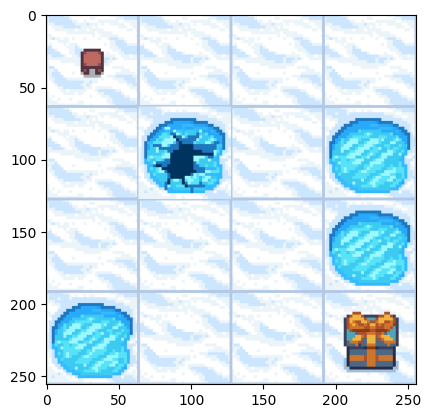

In [13]:
render()

Probability: 0.3333333333333333, Next State: 10, Reward: 0.0, Done: False
Probability: 0.3333333333333333, Next State: 13, Reward: 0.0, Done: False
Probability: 0.3333333333333333, Next State: 14, Reward: 0.0, Done: False
Probability: 0.3333333333333333, Next State: 13, Reward: 0.0, Done: False
Probability: 0.3333333333333333, Next State: 14, Reward: 0.0, Done: False
Probability: 0.3333333333333333, Next State: 15, Reward: 1.0, Done: True
Probability: 0.3333333333333333, Next State: 14, Reward: 0.0, Done: False
Probability: 0.3333333333333333, Next State: 15, Reward: 1.0, Done: True
Probability: 0.3333333333333333, Next State: 10, Reward: 0.0, Done: False
Probability: 0.3333333333333333, Next State: 15, Reward: 1.0, Done: True
Probability: 0.3333333333333333, Next State: 10, Reward: 0.0, Done: False
Probability: 0.3333333333333333, Next State: 13, Reward: 0.0, Done: False


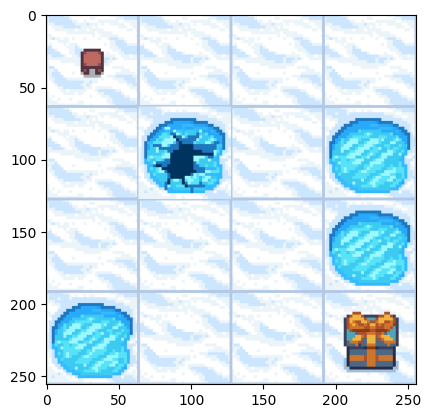

In [14]:
# Choose the state
state = 14
# Extract transitions for each state-action pair
for action in range(num_actions):
    transitions = env.unwrapped.P[state][action]
    # Print details of each transition
    for transition in transitions:
        probability, next_state, reward, done = transition
        print(f"Probability: {probability}, Next State: {next_state}, Reward: {reward}, Done: {done}")

render()

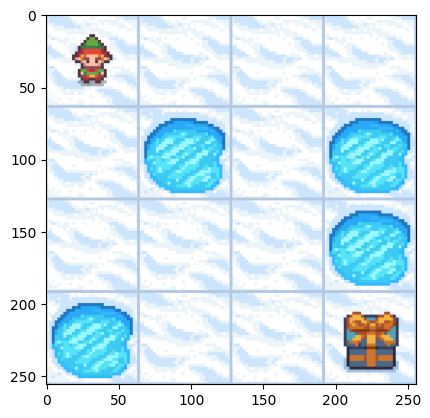

In [15]:
# env = gym.make("MyGridWorld", render_mode = "rgb_array")
initial_state, info = env.reset(seed = 42)
render()

In [16]:
# Define your chosen policy
policy = {0:2, 1:2, 2:1, 3:1, 4:0, 5:0, 6:2, 7:2}

array([[[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]],

       [[180, 200, 230],
        [204, 230, 255],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       ...,

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [235, 245, 249],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]]], dtype=uint8)
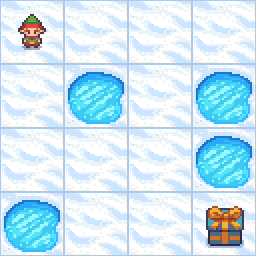

In [17]:
terminal_state = 15
gamma = 0.8

def compute_state_value(state, visited=set()):
    if state == terminal_state:
        return 0
    if state in visited:  # Prevent infinite recursion
        return 0  # Assume zero value for cycles to break recursion

    visited.add(state)  # Track visited states
    action = policy.get(state, 0)  # Get action from policy, default to 0 if missing

    if state not in env.unwrapped.P or action not in env.unwrapped.P[state]:
        return 0  # Handle invalid transitions gracefully

    transition = env.unwrapped.P[state][action]  # Get transition probabilities
    state_value = 0

    for prob, next_state, reward, done in transition:
        state_value += prob * (reward + gamma * compute_state_value(next_state, visited.copy()))

    return state_value

# Compute state values for all states
state_values = {state: compute_state_value(state, set()) for state in range(env.observation_space.n)}

env.render()


In [ ]:
value_function_1 = {0: 1, 1: 2, 2: 3, 3: 7, 4: 6, 5: 4, 6: 8, 7: 10, 8: 0}
value_function_2 = {0: 7, 1: 8, 2: 9, 3: 7, 4: 9, 5: 10, 6: 8, 7: 10, 8: 0}

# Check for each value in policy 1 if it is better than policy 2
one_is_better = [value_function_1[state] >= value_function_2[state] for state in range(num_states)]

# Check for each value in policy 2 if it is better than policy 1
two_is_better = [value_function_1[state] <= value_function_2[state] for state in range(num_states)]

if all(one_is_better):
  print("Policy 1 is better.")
elif all(two_is_better):
  print("Policy 2 is better.")
else:
  print("Neither policy is uniformly better across all states.")

KeyError: 9

In [33]:
def compute_state_value(state, visited=set()):
    if state == terminal_state:
        return 0  # Base case to prevent infinite recursion

    action = policy.get(state, 0)  # Get action from policy, default to 0 if missing
    if state not in env.unwrapped.P or action not in env.unwrapped.P[state]:
        return 0
    state_transitions = env.unwrapped.P[state][action]  # List of (prob, next_state, reward, done) tuples

    expected_value = 0
    for prob, next_state, reward, done in state_transitions:
        expected_value += prob * (reward + gamma * compute_state_value(next_state)) #if not done else reward)

    return expected_value


# ***Action Values***

In [18]:
gamma =0.8
terminal_state = 14
def compute_q_values(state, action):
  if state == terminal_state:
    return 0 # or None, depending on how you want to treat the terminal state Q value

  q_value = 0
  for prob, next_state, reward, terminated in env.unwrapped.P[state][action]:
      q_value += prob * (reward + gamma * compute_state_value(next_state) if not terminated else reward)

  return q_value

In [19]:
num_states = env.observation_space.n
# num_actions = env.action_space.n
num_actions = 4  # Set this to the correct number of actions in your environment

Q = {(state, action): compute_q_values(state, action)
     for state in range(num_states)
     for action in range(num_actions)}


# Choosing an Optimal Policy

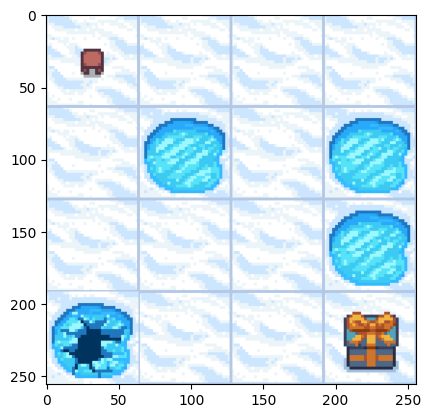

In [21]:
improved_policy = {}

for state in range(num_states-1):
    # Find the best action for each state based on Q-values
    max_action = max(range(num_actions), key = lambda action: Q[(state, action)])
    improved_policy[state] = max_action

terminated = False
while not terminated:
  # Select action based on policy
  action = improved_policy[state]
  # Execute the action
  state, reward, terminated, truncated, info = env.step(action)
  render()

# Policy Iteration


*   Policy Evaluation
*   Policy Improvement



In [28]:

def policy_evaluation(policy):
    V = {state: compute_state_value(state, set()) for state in range(num_states)}
    return V

In [29]:
def policy_improvement(policy):
    improved_policy = {s: 0 for s in range(num_states-1)} #why do we start from 0, shouldn't we use the policy_eval policy

	# Compute the Q-value for each state-action pair
    Q = {(state, action): compute_q_value(state, action, policy) for state in range(num_states) for action in range(num_actions)}

    # Compute the new policy based on the Q-values
    for state in range(num_states-1):
        max_action = max(range(num_actions), key=lambda action:Q[(state, action)] )
        improved_policy[state] = max_action

    return improved_policy

In [34]:
# Complete the policy iteration function
def policy_iteration():
    policy = {0:2, 1:2, 2:1, 3:1, 4:0, 5:0, 6:2, 7:2}
    while True:
        V = policy_evaluation(policy)
        improved_policy = policy_improvement(policy)
        if improved_policy == policy:
            break
        policy = improved_policy

    return policy, V

policy, V = policy_iteration()
render_policy(policy)

RecursionError: maximum recursion depth exceeded

#Monte Carlo

In [ ]:
def generate_episode():
    episode = []
    # Reset the environment
    state, info = env.reset(seed =42)
    terminated = False
    while not terminated:
      # Select a random action
      action = env.action_space.sample()
      next_state, reward, terminated, truncated, info = env.step(action)
      render()
      # Update episode data
      episode.append((state, action, reward))
      state = next_state
    return episode
print(generate_episode())

In [ ]:
for i in range(100):
  episode = generate_episode()
  visited_states = set()
  for j, (state, action, reward) in enumerate(episode):
    # Define the first-visit condition
    if state not in visited_states:
      # Update the returns, their counts and the visited states
      returns_sum[state, action] += sum([x[2] for x in episode[j:]])
      returns_count[state, action] += 1
      visited_states.add((state,action))

nonzero_counts = returns_count != 0

Q[nonzero_counts] = returns_sum[nonzero_counts] / returns_count[nonzero_counts]
render_policy(get_policy())

In [ ]:
def every_visit():
  Q = np.zeros((num_states, num_actions))
  for i in range(100):
    # Generate an episode
    episode = generate_episode()
    # Update the returns and their counts
    for j, (state, action, reward) in enumerate(episode):
      returns_sum[(state,  action)] += sum(x[2] for x in episode[j:])
      returns_count[(state,  action)] += 1

  # Update the Q-values for visited state-action pairs
  nonzero_counts = returns_count!=0
  Q[nonzero_counts] = returns_sum[nonzero_counts]/returns_count[nonzero_counts]

  render_policy(get_policy())

In [27]:
F =set()
F.add((1, 1, 1, 2))
print(F)

{(1, 1, 1, 2)}
